# ML assignment-2
## Question-3
### Importing the necessary modules

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

RANDOM_SEED = 100

### Loading the given dataset

In [10]:
data = pd.read_excel("Q3Dataset.xlsx")

In [11]:
text_df = data.iloc[:,0]
y = data.iloc[:,1]

### Data preprocessing

In [13]:
corpus=[]

#Iterating over lowered data
for val in text_df.str.lower():
    temp = nltk.word_tokenize(val)
    
    #Removing stopwords
    for word in nltk.corpus.stopwords.words('english'):
        if word in temp:
            temp.remove(word)
        
    #Removing punctuation
    for idx in range(len(temp)):
        for val in string.punctuation:
            temp[idx]=temp[idx].replace(val,'')
        
    corpus.append(' '.join(temp))

### Splitting data into training and testing set

In [14]:
from sklearn.model_selection import train_test_split
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.20, random_state=RANDOM_SEED)

### Performing TF-IDF word tokenization

In [15]:
#Fitting vectorizer onto training set
vectorizer = TfidfVectorizer()
vectorizer_train = vectorizer.fit(corpus_train)

X_train = vectorizer_train.transform(corpus_train)
X_test = vectorizer_train.transform(corpus_test)

### Training a SVM classifier

In [16]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

#Initial results
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        94
           1       0.84      0.75      0.79       106

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



### Hyperparameter tuning

In [17]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.01, 0.5, 1, 10, 50,100], 'gamma':('scale', 'auto')}
scoring = ['f1_micro', 'roc_auc', 'accuracy']
cv = 3

clf_cv = GridSearchCV(SVC(), param_grid=parameters,cv=cv,scoring=scoring,verbose=RANDOM_SEED,refit='f1_micro')
clf_cv.fit(X_train, y_train)

...........
[CV 3/3; 18/48] END C=1, gamma=scale, kernel=rbf; accuracy: (test=0.771) f1_micro: (test=0.771) roc_auc: (test=0.846) total time=   0.0s
[CV 1/3; 19/48] START C=1, gamma=scale, kernel=poly.............................
[CV 1/3; 19/48] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.700) f1_micro: (test=0.700) roc_auc: (test=0.827) total time=   0.0s
[CV 2/3; 19/48] START C=1, gamma=scale, kernel=poly.............................
[CV 2/3; 19/48] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.749) f1_micro: (test=0.749) roc_auc: (test=0.814) total time=   0.0s
[CV 3/3; 19/48] START C=1, gamma=scale, kernel=poly.............................
[CV 3/3; 19/48] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.714) f1_micro: (test=0.714) roc_auc: (test=0.845) total time=   0.1s
[CV 1/3; 20/48] START C=1, gamma=scale, kernel=sigmoid..........................
[CV 1/3; 20/48] END C=1, gamma=scale, kernel=sigmoid; accuracy: (test=0.760) f1_micro: (test=0.760) roc_auc: (tes

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.5, 1, 10, 50, 100],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             refit='f1_micro', scoring=['f1_micro', 'roc_auc', 'accuracy'],
             verbose=100)

### Results for best parameters

In [15]:
print(clf_cv.best_params_, clf_cv.best_score_)
print(clf_cv.best_estimator_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 0.8000056320576722
SVC(C=10)


In [18]:
clf_final = clf_cv.best_estimator_
clf_final.fit(X_train, y_train)
y_test_pred = clf_final.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        94
           1       0.84      0.78      0.81       106

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



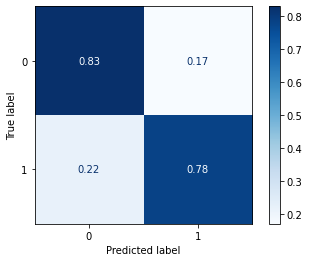

In [19]:
plot_confusion_matrix(clf_final, X_test, y_test,cmap=plt.cm.Blues,normalize='true')  

### Saving the model

In [20]:
from joblib import dump, load
dump(clf_final, 'Q3Model.joblib') 

['Q3Model.joblib']